# Simulations of Dimer System - Stable Parameters

In [186]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import trackpy as tp

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Single particle with walls:

### Lenard Jones Cutoff and Scaling

The wall interaction is given by:

$$ E = \epsilon\left[\frac{2}{15}\left(\frac{\sigma}{r}\right)^9-\left(\frac{\sigma}{r}\right)^3\right]$$
where $r$ is the distance from the wall to the center of the particle, $\sigma$ is something like the particle radius.

If I plot this, it looks like:

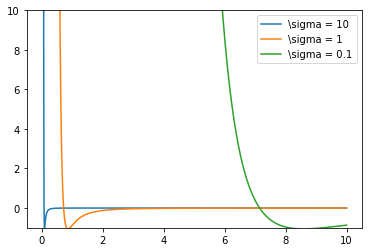

In [357]:
r = np.linspace(0,10,1000).reshape(1000,1)
r = r[1::]
sgm = np.array([.1,1,10]).reshape(1,3)
eps = 1

E = eps*(2/15*(sgm/r)**9 - (sgm/r)**3)

fig, ax = plt.subplots(1,1)
ax.plot(r,E)
ax.set_ylim([-1,10])
ax.legend({'\sigma = 0.1','\sigma = 1','\sigma = 10'})

Maybe something like $sigma = 0.2$, and then I cutoff at $r_c=1\mu{}m$

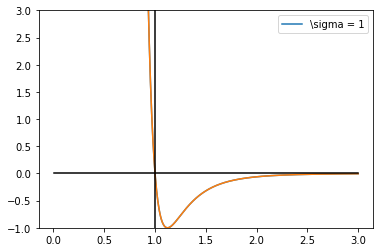

In [360]:
r = np.linspace(0,3,1000).reshape(1000,1)
r = r[1::]
sgm = np.array([1,1]).reshape(1,2)
eps = 1

E = 4*eps*((sgm/r)**12 - (sgm/r)**6)

fig, ax = plt.subplots(1,1)
ax.plot(r,E)
ax.plot(np.array([1,1])*1,[-1,3],color='k')
ax.plot(r,0*r,color='k')
ax.set_ylim([-1,3])
ax.legend({'\sigma = 1'})

## Single Particle diffusion

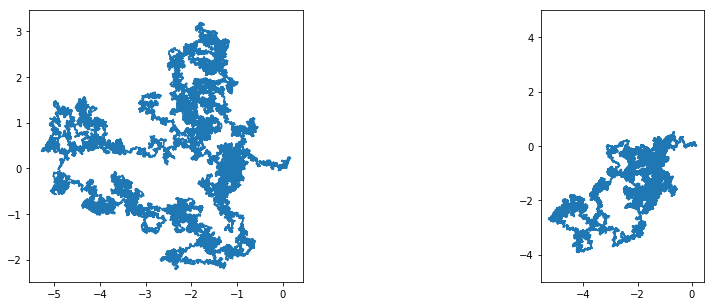

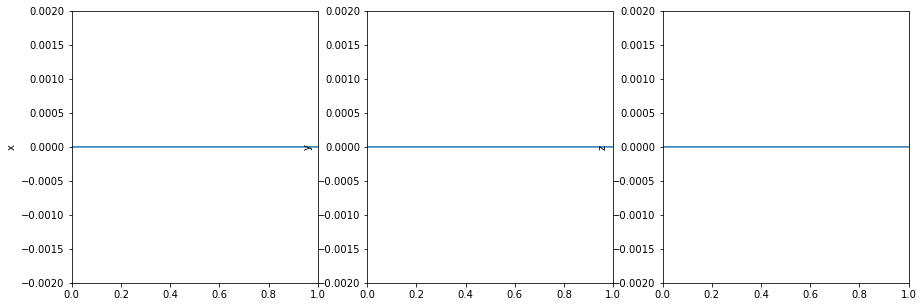

In [445]:
initial_positions = np.array([[0,0,0]])

sim = lmp.sim(initial_positions,
              magnitude = 0,
              frequency=1,
              susceptibility = 0.5,
              angle=0,
              lj_parameters=[1e-6,1],
              lj_cutoff = 1,
              framerate=1e4,
              timestep=1e-4,
              total_time = 10)

sim.generate_scripts()
sim.run()
trj = sim.load(read_trj=True)
plot_trj(trj)
plot_moment(trj)

In [446]:
idx = pd.IndexSlice
trj_single = trj.reset_index(level=[1])
trj_single.index = trj_single.index.map(int)
fps = sim.run_parameters.framerate

trj_single['frame'] = trj_single.index
msd = tp.msd(trj_single,1,fps,max_lagtime=sim.run_steps)

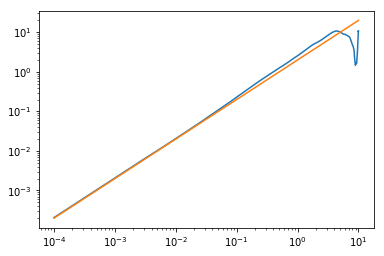

In [447]:
plt.loglog(msd.lagt,msd.msd)
D = sim.particle_properties[0].diffusion
plt.loglog([1/fps,10],2*D*np.array([1/fps,10]));

# Particle pairs with parallel dipole moments, in the almost absence of temperature

### $\Delta t=0.01ms$

1000.0
0.0033333333333333335


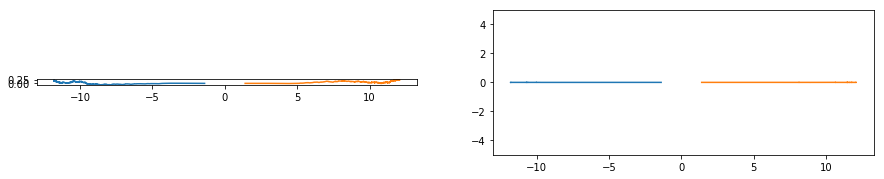

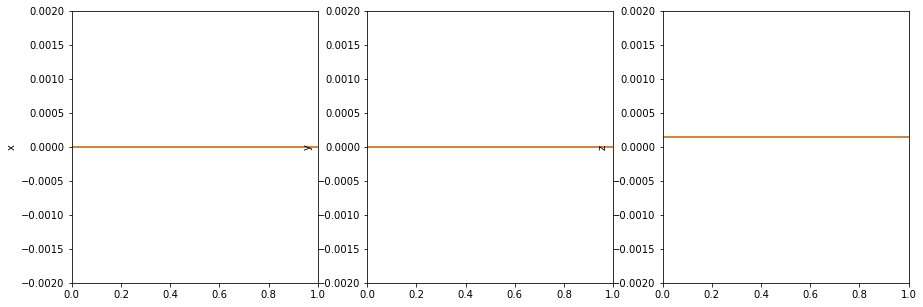

In [584]:
initial_positions = np.array([[-1.4,0,0],[1.4,0,0]])

temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 1e3 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)
print(diffusion)

temp = 1
diffusion = Kb*temp/drag*1e-3
print(diffusion)

sim = lmp.sim(initial_positions,
              magnitude = 10,
              radius = 1.4,
              diffusion = diffusion,
              frequency=1,
              susceptibility = 0.5,
              angle=0,
              lj_parameters=[1e-6,1],
              lj_cutoff = 1,
              framerate=1e2,
              timestep=1e-5,
              total_time = 10,
              walls = [-1,1],
              temperature = 1)

sim.generate_scripts()
sim.run()
trj = sim.load(read_trj=True)
plot_trj(trj)
plot_moment(trj)

The separation distance of two magnetic particles with susceptibility $\xi$ is given by:

$$ d = \sqrt[5]{5At+(2\sigma)^5} $$
$$ A = \frac{8\pi D}{3\mu_0K_bT}\left(\frac{\sigma^3\chi B}{\mu_r}\right)^2$$

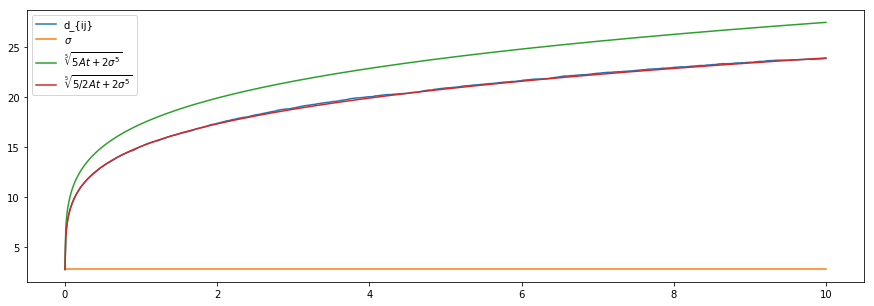

In [585]:
plot_distance(trj)

sgm = 1e3*sim.particle_properties[0].radius # nm
B = sim.field_parameters.magnitude  #mT = (pN/A/nm)
D = 1e6*sim.particle_properties[0].diffusion #(nm^2/s)
T = sim.sim_parameters.temperature
Kb = 4/300 # pN nm
mu0 = 4*np.pi*1e5 #(pN/A^2) 
xi = sim.particle_properties[0].susceptibility
A = 8*np.pi*D/(3*mu0*Kb*T)*(sgm**3*xi*B)**2

t = np.linspace(0,10,1000)
plt.plot(t,1e-3*(5*A*t+(2*sgm)**5)**(1/5))
plt.plot(t,1e-3*(2.5*A*t+(2*sgm)**5)**(1/5))

plt.legend(['d_{ij}','$\sigma$','$\sqrt[5]{5At+2\sigma^5}$','$\sqrt[5]{5/2At+2\sigma^5}$'])

### $\Delta t=0.1ms$

1000.0
0.0033333333333333335


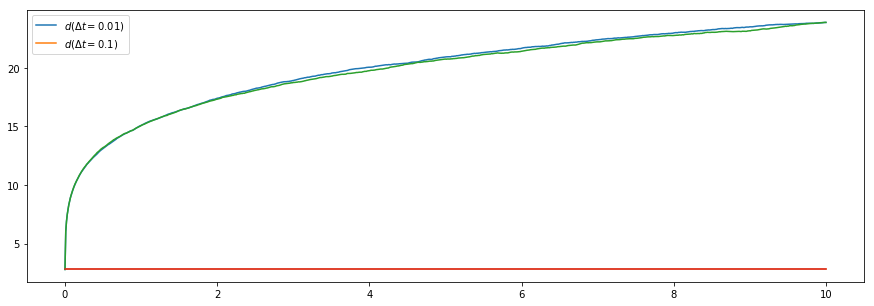

In [586]:
initial_positions = np.array([[-1.4,0,0],[1.4,0,0]])

temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 1e3 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)
print(diffusion)

temp = 1
diffusion = Kb*temp/drag*1e-3
print(diffusion)

sim = lmp.sim(initial_positions,
              magnitude = 10,
              radius = 1.4,
              diffusion = diffusion,
              frequency=1,
              susceptibility = 0.5,
              angle=0,
              lj_parameters=[1e-6,1],
              lj_cutoff = 1,
              framerate=1e2,
              timestep=1e-4,
              total_time = 10,
              walls = [-1,1],
              temperature = 1)

sim.generate_scripts()
sim.run()
trj_1 = sim.load(read_trj=True)

ax = plot_distance(trj)
plot_distance(trj_1,ax=ax)
plt.legend(['$d(\Delta t = 0.01)$','$d(\Delta t = 0.1)$'])

# Particle pairs with in plane rotating dipole moments, in the almost absence of temperature

100.0
0.0003333333333333334


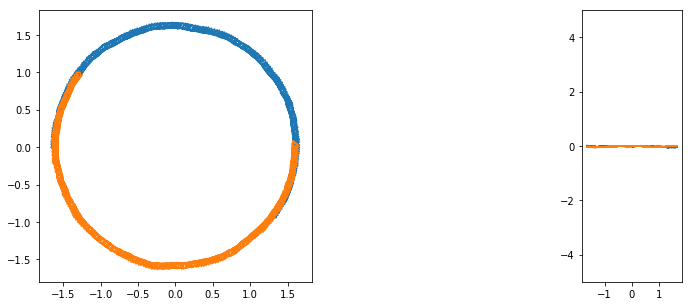

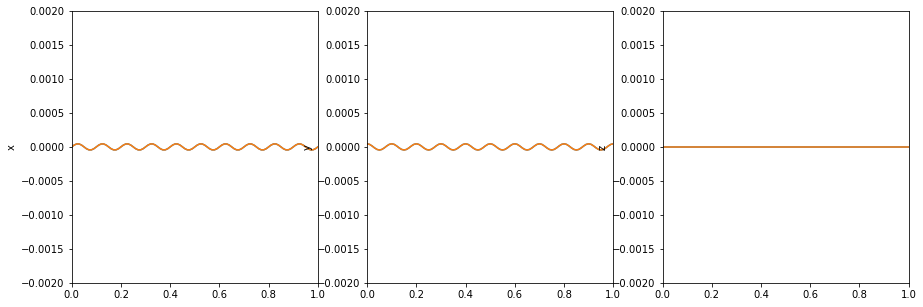

In [668]:
initial_positions = np.array([[-1.6,0,0],[1.6,0,0]])

temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 0.1e3 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)
print(diffusion)

temp = 1
diffusion = Kb*temp/drag*1e-3
print(diffusion)

sim = lmp.sim(initial_positions,
              magnitude = 3,
              radius = 1.4,
              diffusion = diffusion,
              frequency=10,
              susceptibility = 0.5,
              angle=90,
              lj_parameters=[1,1],
              lj_cutoff = 1*2**(1/6),
              framerate=1e2,
              timestep=1e-4,
              total_time = 10,
              walls = [-2.5,2.5],
              temperature = 1)

sim.generate_scripts()
sim.run()
trj = sim.load(read_trj=True)
plot_trj(trj)
plot_moment(trj)

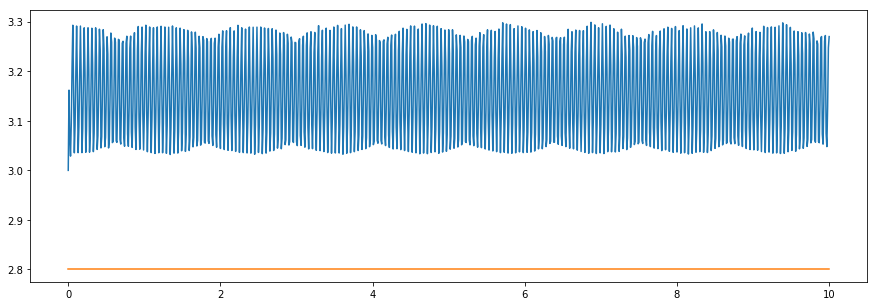

In [657]:
ax = plot_distance(trj)

# Two particles in a precessing magnetic field

100.0
0.0003333333333333334


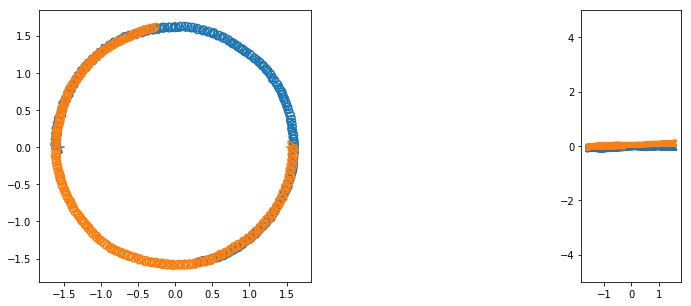

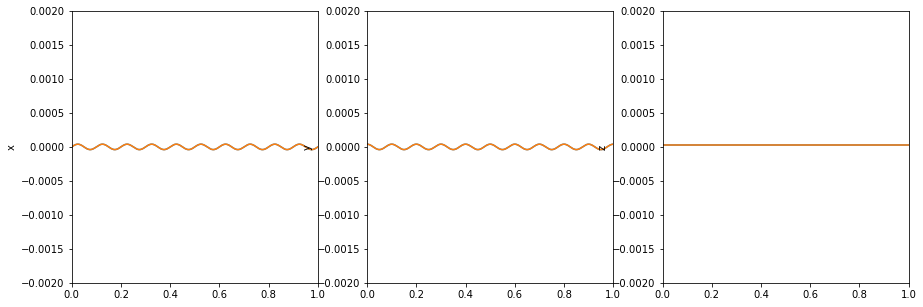

In [660]:
initial_positions = np.array([[-1.5,0,0],[1.5,0,0]])

h = 4
temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 0.1e3 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)
print(diffusion)

temp = 1
diffusion = Kb*temp/drag*1e-3
print(diffusion)

sim = lmp.sim(initial_positions,
              magnitude = 3,
              radius = 1.4,
              diffusion = diffusion,
              frequency=10,
              susceptibility = 0.5,
              angle=60,
              lj_parameters=[1e-3,1],
              lj_cutoff = 1*2**(1/6),
              framerate=1e3,
              timestep=1e-4,
              total_time = 10,
              walls = [-h/2,h/2],
              temperature = 1)

sim.generate_scripts()
sim.run()
trj = sim.load(read_trj=True)
plot_trj(trj)
plot_moment(trj)

100000.0
0.0003333333333333333


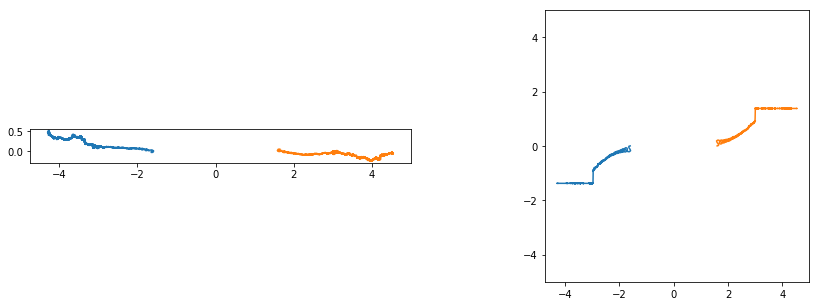

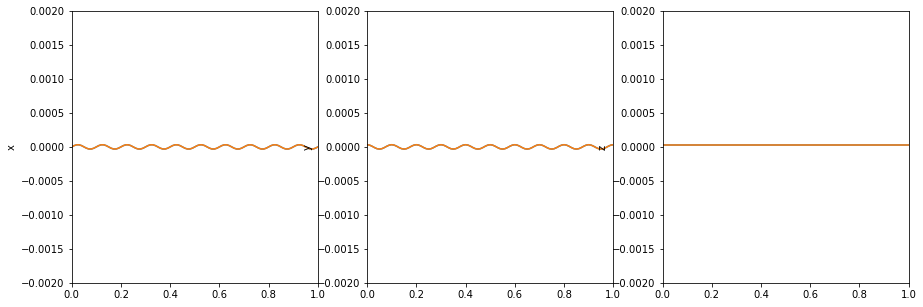

In [677]:
initial_positions = np.array([[-1.6,0,0],[1.6,0,0]])

h = 5
temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 0.1e6 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)
print(diffusion)

temp = 1
diffusion = Kb*temp/drag*1e-6
print(diffusion)

sim = lmp.sim(initial_positions,
              magnitude = 3,
              radius = 1.4,
              diffusion = diffusion,
              frequency=10,
              susceptibility = 0.5,
              angle=45,
              lj_parameters=[1e-3,1],
              lj_cutoff = 1*2**(1/6),
              framerate=1e2,
              timestep=1e-4,
              total_time = 100,
              walls = [-h/2,h/2],
              temperature = 1)

sim.generate_scripts()
sim.run()
trj = sim.load(read_trj=True)
plot_trj(trj)
plot_moment(trj)

### Pairwise Lennard Jones interaction

The pairwise interaction is a dipole but at close range, it appears to be a Lennard Jones 12-6

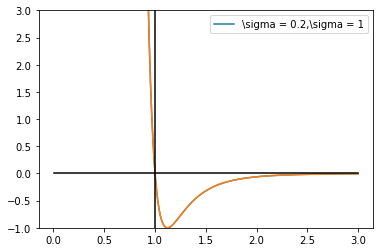

In [284]:
r = np.linspace(0,3,1000).reshape(1000,1)
r = r[1::]
sgm = np.array([1,1]).reshape(1,2)
eps = 1

E = 4*eps*((sgm/r)**12 - (sgm/r)**6)

fig, ax = plt.subplots(1,1)
ax.plot(r,E)
ax.plot(np.array([1,1])*1,[-1,3],color='k')
ax.plot(r,0*r,color='k')
ax.set_ylim([-1,3])
ax.legend({'\sigma = 0.2,\sigma = 1'})

# Support Functions

In [352]:
def plot_trj(trj):
    idx = pd.IndexSlice

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    for i in trj.index.get_level_values('id').unique():
        ax1.plot(trj.loc[idx[:,i],'x'],trj.loc[idx[:,i],'y'])
        ax2.plot(trj.loc[idx[:,i],'x'],trj.loc[idx[:,i],'z'])

    ax1.set(aspect='equal');
    ax2.set(aspect='equal');
    ax2.set_ylim([-5,5])

In [354]:
def plot_moment(trj):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    timestep = sim.run_parameters.timestep
    for i in trj.index.get_level_values('id').unique():
        ax1.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').mux)
        ax2.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').muy)
        ax3.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').muz)

    ax1.set_ylabel('x')
    ax2.set_ylabel('y')
    ax3.set_ylabel('z')

    ax1.set_xlim([0,1])
    ax2.set_xlim([0,1])
    ax3.set_xlim([0,1])

    f = 0.002
    ax1.set_ylim([-f,f])
    ax2.set_ylim([-f,f])
    ax3.set_ylim([-f,f])

In [580]:
def plot_distance(trj, ax=None):
    if ax==None:
        fig, ax = plt.subplots(1,figsize=(15,5))
    
    ax.plot(trj.xs(1,level='id').t,
             np.sqrt((trj.loc[idx[:,1],'x'].values-trj.loc[idx[:,2],'x'].values)**2 + 
            (trj.loc[idx[:,1],'y'].values-trj.loc[idx[:,2],'y'].values)**2))
    ax.plot(trj.xs(1,level='id').t,trj.xs(1,level='id').index*0+2.8)
    return ax

In [561]:
def test(f=None):
    print(f)

In [563]:
test(f=1)

1
